<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [124]:
import pandas as pd
import psycopg2
import warnings
warnings.simplefilter(action='ignore', category=UserWarning) # Отключаем назойливые UserWarning's Pandas

In [126]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [127]:
query = f'''
select 
    count(*)
from 
    vacancies
'''

In [128]:
data = pd.read_sql_query(query, connection)
data['count'][0]

49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [129]:
query = f'''
select 
    count(*)
from 
    employers
'''

In [130]:
data = pd.read_sql_query(query, connection)
data['count'][0]

23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [131]:
query = f'''
select 
    count(*)
from 
    areas
'''

In [132]:
data = pd.read_sql_query(query, connection)
data['count'][0]

1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [133]:
query = f'''
select 
    count(*)
from 
    industries
'''

In [134]:
data = pd.read_sql_query(query, connection)
data['count'][0]

294

***

#### Набор данных имеет 49197 вакансий от 23501 работодателя, которые охватывают 1362 региона, и подразделяются на 294 сферы делятельности.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [135]:
query = f'''
select 
    a.name area,
    count(*) cnt
from 
    vacancies v
    join areas a on v.area_id = a.id
group by 
    a.name
order by 
    cnt desc
'''

In [136]:
data = pd.read_sql_query(query, connection)
data.head(5)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [137]:
query = f'''
select 
    count(*) cnt
from 
    vacancies
where 
    salary_from is not null
    or salary_to is not null
'''

In [138]:
data = pd.read_sql_query(query, connection)
data['cnt'][0]

24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [139]:
query = f'''
select 
    round(avg(salary_from)) avg_from,
    round(avg(salary_to)) avg_to
from 
    vacancies
'''

In [140]:
data = pd.read_sql_query(query, connection)
data

,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [141]:
query = f'''
select 
    schedule,
    employment,
    count(*)
from 
    vacancies
group by 
    schedule, employment
order by 
    count desc
'''

In [142]:
data = pd.read_sql_query(query, connection)
data

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [143]:
query = f'''
select 
    experience,
    count(*)
from 
    vacancies
group by 
    experience
order by 
    count
'''

In [144]:
data = pd.read_sql_query(query, connection)
data

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

#### Большинство данных относятся к РФ, но существенная часть охватывает ближайшее зарубежье. Половина содержит информацию о размере ЗП, которая в среднем составляет от 71 до 110 тыс.р. Большая часть вакансий требует опыт работы от 1 года до 3 лет, похоже, с точки зрения работодателя такие специалисты имеют оптимальное соотношение цена/качество для решения большинсва задач.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [145]:
query = f'''
(select 
    e.name,
    count(*)
from 
    vacancies v
    join employers e on v.employer_id = e.id
group by 
    e.name
order by 
    count desc
limit 1)

union

(select 
    e.name,
    count(*)
from 
    vacancies v
    join employers e on v.employer_id = e.id
group by 
    e.name
order by 
    count desc
offset 4 limit 1)

order by 
    count desc
'''

In [146]:
data = pd.read_sql_query(query, connection)
data

,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [147]:
query = f'''
select 
    area.name,
    count(e.id) employers_cnt,
    count(v.id) vacancies_cnt
from 
    areas area
    join employers e on e.area = area.id
    left join vacancies v on area.id = area_id
    group by area.name
having 
    count(v.id) = 0
order by 
    employers_cnt desc
limit 1
'''

In [148]:
data = pd.read_sql_query(query, connection)
data

,name,employers_cnt,vacancies_cnt
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [149]:
query = f'''
select 
    e.name,
    count(distinct(area_id)) areas_count
from 
    employers e
    left join vacancies v on e.id = employer_id
group by 
    e.name
order by 
    areas_count desc
'''

In [150]:
data = pd.read_sql_query(query, connection)
data

,name,areas_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [151]:
query = f'''
select 
    count(*)
from 
    employers e
    left join employers_industries on e.id = employer_id
where 
    industry_id is null
'''

In [152]:
data = pd.read_sql_query(query, connection)
data['count'][0]

8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [153]:
query = f'''
select 
    e.name,
    count(distinct(industry_id))
from 
    employers e
    join employers_industries on e.id = employer_id
group by 
    e.name
having 
    count(distinct(industry_id)) = 4
order by 1
offset 2 limit 1
'''

In [154]:
data = pd.read_sql_query(query, connection)
data['name'][0]

'2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [155]:
query = f'''
select 
    count(*)
from 
    employers_industries
    join industries i on i.id = industry_id 
where 
    i.name = 'Разработка программного обеспечения'
'''

In [156]:
data = pd.read_sql_query(query, connection)
data['count'][0]

3553

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [157]:
def get_million_cities_from_wiki():
    """Get list of million cities from wikipedia

    Returns:
        [list]: [Million cities list]
    """
    import requests
    url = 'https://ru.wikipedia.org/w/index.php?title=%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
    response = requests.get(url)
    million_city=pd.read_html(response.text)[1]
    # Убираем спецсимволы в конце
    result = million_city['Город'].apply(lambda x: x[:-3] if x[-1]==']' else x)

    return result.to_list() 


print(get_million_cities_from_wiki())

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград']


In [158]:
query = f'''
select 
    a.name town_name,
    count(*)
from 
    vacancies v
    join areas a on a.id = area_id
    join employers e on e.id = employer_id
where 
    e.name = 'Яндекс'
group by 
    a.name
'''

In [159]:
def add_total(df:pd.DataFrame):
    """Add total sum of second column in two columns DataFrame.
       Second col must be numeric type.

    Args:
        df (pd.DataFrame): [2 cols DataFrame]

    Returns:
        [pd.DataFrame]: [DataFrame with total sum row]
    """
    if len(df.columns) != 2: raise Exception('Must be only 2 columns in DataFrame!')
    
    total = df[df.columns[1]].sum()
    total_row = pd.DataFrame([{df.columns[0]: 'Total', df.columns[1]: total}])
    result = pd.concat([data, total_row], ignore_index=True, axis=0)
    
    return result

    
data = pd.read_sql_query(query, connection)

# Отфильтровываем города по списку, сортируем
cities = get_million_cities_from_wiki()
filter = data['town_name'].apply(lambda x: x in cities)         
data = data[filter].sort_values(by='count', ignore_index=True)

# Добавляем тотал
data = add_total(data)
data

,town_name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Казань,25
5,Пермь,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

#### Крупные ИТ компании, среди которых лидирует Яндекс, набирают сотрудников по всей стране.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [160]:
query = f'''
select 
    count(*)
from 
    vacancies
where 
    lower(name) like '%данн%' or lower(name) like'%data%'
'''

In [161]:
data = pd.read_sql_query(query, connection)
data['count'][0]

1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [162]:
query = f'''
select 
    count(*)
from 
    vacancies
where 
    (lower(name)   like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and
    (lower(name)         like '%junior%'
    or lower(experience) like '%нет опыта%'
    or lower(employment) like '%стажировка%')
'''

In [163]:
data = pd.read_sql_query(query, connection)
data['count'][0]

51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [164]:
query = f'''
select 
    count(*)
from 
    vacancies
where 
    (lower(name)   like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and
    (key_skills          like '%SQL%'
    or lower(key_skills) like '%postgres%')
'''

In [165]:
data = pd.read_sql_query(query, connection)
data['count'][0]

201

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [166]:
query = f'''
select 
    count(*)
from 
    vacancies
where 
    (lower(name)   like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and
    lower(key_skills) like '%python%'
'''

In [167]:
data = pd.read_sql_query(query, connection)
data['count'][0]

351

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [168]:
query = f'''
select 
    avg(length(key_skills) - length(replace(key_skills, CHR(9), '')) + 1) avg
from 
    vacancies
where 
    (lower(name)   like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and 
    key_skills is not null
'''

In [169]:
data = pd.read_sql_query(query, connection)
round(data['avg'][0], 2)

6.41

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [170]:
query = f'''
select
    experience,
    avg((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) /2)
from 
    vacancies
where
    (lower(name)   like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and
    (salary_from is not null
    or salary_to is not null)
group by 
    experience
'''
data = pd.read_sql_query(query, connection)
data

,experience,avg
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


In [171]:
round(data['avg'][data['experience']=='От 3 до 6 лет'].iloc[0])

243115

***

#### В датасете 1771 вакансия связаная с данными. Вроде бы не мало, но, например, выборка "DS без опыта работы" составляет всего 51 строку.

# Общий вывод по проекту

### Попробуем повизуализировать. Для начала посмотрим долю вакансий DS среди IT:

<AxesSubplot: title={'center': 'Доля DS среди IT вакансий'}, ylabel='count'>

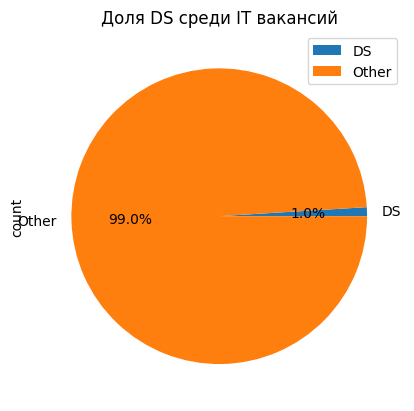

In [172]:
query = f'''
select
    'DS' proffession,
    count(*)
from 
    vacancies
where
    lower(name)    like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%'
    
union

select
    'Other',
    count(*)
from 
    vacancies
where
    not (lower(name)    like '%data scientist%' 
         or lower(name) like '%data science%'
         or lower(name) like '%исследователь данных%'
         or name        like '%ML%' and name not like '%HTML%'
         or lower(name) like '%machine learning%'
         or lower(name) like '%машинн%обучен%')
'''
data = pd.read_sql_query(query, connection)
data.plot.pie(y='count',
              labels=data['proffession'],
              title='Доля DS среди IT вакансий',
              autopct='%1.1f%%'
              )

#### Доля DS вакансий около 1 процента.

### Построим график зависимости ЗП в вакансиях, в зависимости от опыта работы. Для этого преобразуем опыт работы в среднее значение лет:

In [173]:
query = f'''
select
    experience,
    avg((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) /2)
from 
    vacancies
where
    (lower(name)   like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and
    (salary_from is not null
    or salary_to is not null)
group by 
    experience
'''

<AxesSubplot: title={'center': 'Зависимость ЗП от опыта работы'}, xlabel='Опыт работы, лет', ylabel='ЗП'>

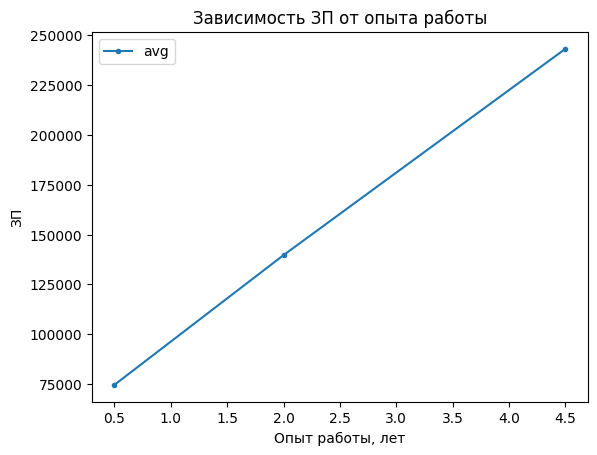

In [174]:
def years_avg(s:str):
    # Возьмем середину каждого диапазона
    if 'Нет' in s: return 0.5
    elif 'От 1' in s: return 2
    else: return 4.5
    
data = pd.read_sql_query(query, connection)
data['experience'] = data['experience'].apply(years_avg)
data.plot(kind='line', 
          x='experience', 
          y='avg', 
          xlabel='Опыт работы, лет', 
          ylabel='ЗП', 
          title='Зависимость ЗП от опыта работы', 
          style='.-'
          )

#### Посмотрим размер выборки вакансий DS с указанной ЗП.

In [175]:
query = f'''
select
    count(*)
from 
    vacancies
where
    (lower(name)   like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and
    (salary_from is not null
    or salary_to is not null)

'''
data = pd.read_sql_query(query, connection)    
data['count'][0]

62

#### В данных наблюдается линейная зависимость ЗП от опыта работы в сфере DS. Но размер выборки, на мой взгляд, недостаточен для достоверных выводов.

### Посмотрим на требуемые ключевые навыки в вакансиях для DS:

In [176]:
query = f'''
select
    key_skills
from 
    vacancies
where
    lower(name)    like '%data scientist%' 
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or name        like '%ML%' and name not like '%HTML%'
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%'
'''

<AxesSubplot: title={'center': '30 наиболее востребованных ключевых навыков для DS'}, ylabel='Ключевые навыки'>

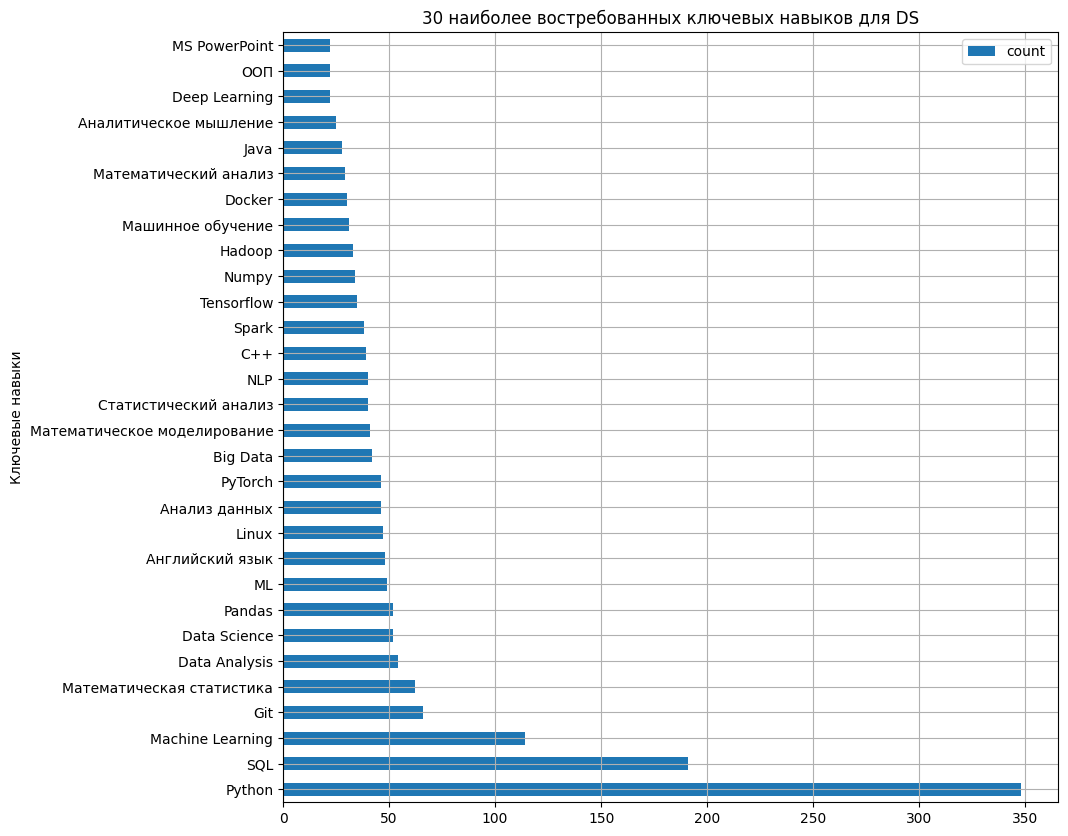

In [177]:
data = pd.read_sql_query(query, connection)

from collections import Counter
counter = Counter()
for val in data['key_skills']:
    if val is not None:
        for key_skill in val.split('\t'):
            counter[key_skill] += 1
            
plot_data = pd.DataFrame(list(counter.items()), columns=['key_skill', 'count'])
plot_data.sort_values(by='count', ascending=False, ignore_index=True, inplace=True)

plot_data.iloc[:30].plot(
    kind='barh', 
    x='key_skill', 
    y='count', 
    figsize=(10, 10), 
    grid=True, 
    ylabel='Ключевые навыки', 
    title='30 наиболее востребованных ключевых навыков для DS'
    )

#### По мнению работодателей, главный иструмент DS это Python, на втором месте SQL.

### Посмотрим другие вакансии, которые требуют 2 основных ключевых навыка DS (Python и SQL):

<AxesSubplot: title={'center': 'ТОП 20 вакансий с ключевыми навыками Python и SQL'}, ylabel='name'>

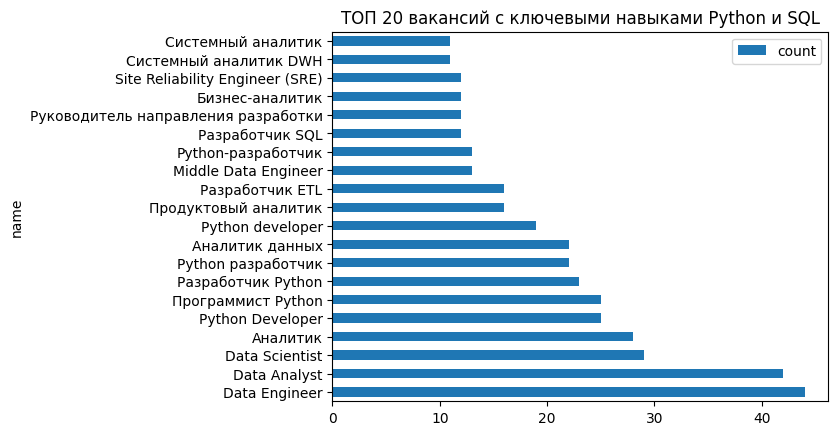

In [178]:
query = f'''
select 
    name,
    count(*)
from 
    vacancies
where 
    key_skills like '%SQL%'
    and
    lower(key_skills) like '%python%'
group by 
    name
order by count desc
'''
data = pd.read_sql_query(query, connection)

data.iloc[:20].plot.barh(
    y='count',
    x='name',
    title='ТОП 20 вакансий с ключевыми навыками Python и SQL'
    )

#### Я считаю, что выборка по DS из датасета не достаточно большая (особенно для junior), можно рекомендовать начинающим DS-специалистам вакансии по смежным профессиям, где можно набраться опыта по ключевым навыкам Data Science.